### Analysis of the correlation between Stock Markets and Elections

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

The Analysis is build on two main data sets. The first one is an Excel file including election dates and outcomes of the five biggest economies in Europe: Germany, United Kingdom, France, Italy and Spain. The data looks at the most important election in each country (e.g. general elections in UK) and goes back to the 1980s. It includes the political position of the winning party and whether the election outcome was close or not.

In [2]:
# load election data from Excel File
elec_data_file = r"C:\Users\berni\OneDrive\Dokumente\Python_Projects\Elections_Project\Election_Data_V3.xlsx"
elec_data_unfiltered = pd.read_excel(elec_data_file, usecols="A:G")
elec_data_unfiltered['Date'] = pd.to_datetime(elec_data_unfiltered['Date'], errors='raise')

# filter elction data to only use last 30 years 
last_30_years = pd.to_datetime('today') - pd.DateOffset(years=30)
elec_data = elec_data_unfiltered[elec_data_unfiltered['Date'] > last_30_years]

# give an index to the spectrum
spectrum_mapping = {"left": -2, "centre-left": -1, "centre": 0, "centre-right": 1, "right": 2}
elec_data["Spec_Index"] = elec_data["Spectrum"].map(spectrum_mapping)

# binary "close" index
close_mapping = {"Yes": 1, "No": 0}
elec_data["Close_Index"] = elec_data["Close"].map(close_mapping)

C:\Users\berni\AppData\Local\Temp\ipykernel_18704\3134754931.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elec_data["Spec_Index"] = elec_data["Spectrum"].map(spectrum_mapping)
C:\Users\berni\AppData\Local\Temp\ipykernel_18704\3134754931.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elec_data["Close_Index"] = elec_data["Close"].map(close_mapping)


In [3]:
elec_data.head(10)

,Date,Country,Spectrum,Close,Party,Share,Winner,Spec_Index,Close_Index
0,2021-09-26,Germany,centre-left,Yes,SPD,25.7,Scholz,-1,1
1,2017-09-24,Germany,centre,No,CDU,32.9,Merkel,0,0
2,2013-09-22,Germany,centre,No,CDU,41.5,Merkel,0,0
3,2009-09-27,Germany,centre-right,No,CDU,33.8,Merkel,1,0
4,2005-09-18,Germany,centre,No,CDU,35.2,Merkel,0,0
5,2002-09-22,Germany,centre-left,Yes,SPD,38.5,Schroeder,-1,1
6,1998-09-27,Germany,centre-left,No,SPD,40.9,Schroeder,-1,0
7,1994-10-16,Germany,centre-right,Yes,CDU,41.4,Kohl,1,1
12,2019-12-12,UK,centre-right,No,Tories,43.6,Johnson,1,0
13,2017-06-08,UK,centre-right,No,Tories,42.3,May,1,0


The second data set is from Yahoo Finance. It includes the stock market prices of the biggest indices from each of the five economies (e.g. DAX in Germany). The data has daily opening and closing numbers.

In [4]:
# clarification of what data to use from Yahoo Finance
tickers = ['^FTSE','^GDAXI','FTSEMIB.MI','^FCHI','^IBEX']
index_to_country = {'^FTSE':'UK','^GDAXI':'Germany','FTSEMIB.MI':'Italy','^FCHI':'France','^IBEX': 'Spain'}
start_date = '1994-01-01'
end_date = '2023-12-31'

# makes a new df by iterating through all five stock indices and adds country as a key
df = []
for index in tickers:
    data = yf.download(index, start=start_date, end=end_date)
    data['Index'] = index
    df.append(data)
stock_data_i = pd.concat(df)
stock_data_i['Country'] = stock_data_i['Index'].map(index_to_country)
stock_data = stock_data_i.reset_index()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
stock_data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Index,Country
0,1994-01-04,3427.199951,3427.899902,3380.399902,3408.500000,3408.500000,0,^FTSE,UK
1,1994-01-05,3417.500000,3419.399902,3379.100098,3379.199951,3379.199951,0,^FTSE,UK
2,1994-01-06,3355.300049,3407.699951,3355.300049,3403.000000,3403.000000,0,^FTSE,UK
3,1994-01-07,3401.399902,3446.800049,3398.699951,3446.000000,3446.000000,0,^FTSE,UK
4,1994-01-10,3465.699951,3468.100098,3430.000000,3440.600098,3440.600098,0,^FTSE,UK
5,1994-01-11,3442.500000,3442.500000,3413.500000,3413.800049,3413.800049,0,^FTSE,UK
6,1994-01-12,3394.800049,3402.399902,3372.000000,3372.000000,3372.000000,0,^FTSE,UK
7,1994-01-13,3380.699951,3383.300049,3356.899902,3360.000000,3360.000000,0,^FTSE,UK
8,1994-01-14,3370.899902,3405.600098,3369.399902,3400.600098,3400.600098,0,^FTSE,UK
9,1994-01-17,3405.399902,3421.100098,3397.399902,3407.800049,3407.800049,0,^FTSE,UK


### Visulisation of the Data

Here are some general visulisations of the Data. First the political spectrum of the country, then the developement of its stock index over time.

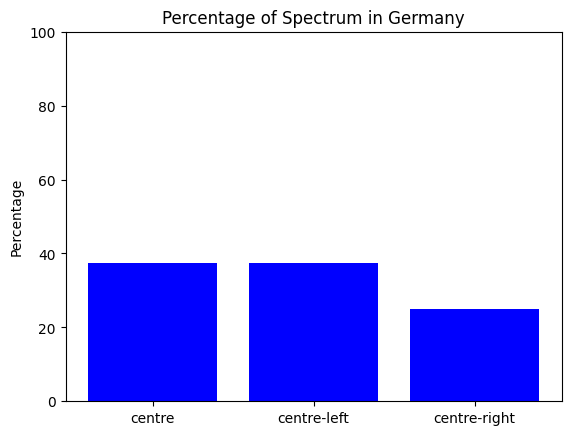

<Figure size 600x400 with 0 Axes>

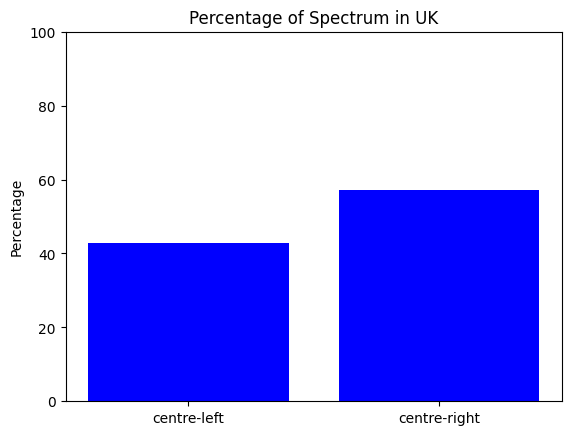

<Figure size 600x400 with 0 Axes>

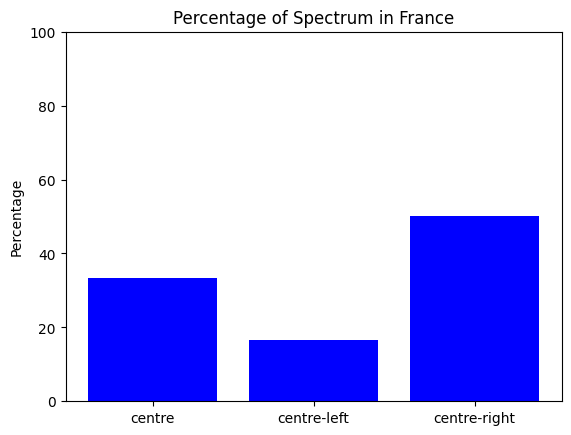

<Figure size 600x400 with 0 Axes>

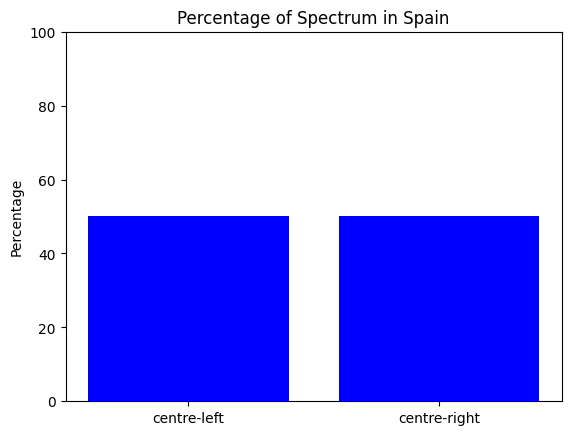

<Figure size 600x400 with 0 Axes>

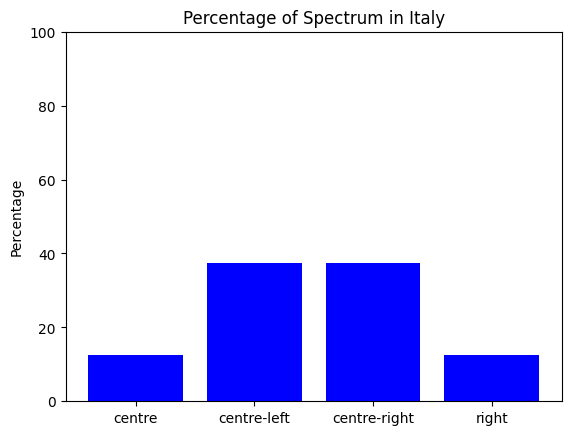

<Figure size 600x400 with 0 Axes>

In [6]:
# Calculate the percentage of "left", "centre-left", "centre", "centre-right" and "right" for each country
country_counts = elec_data.groupby(['Country', 'Spectrum']).size()
country_totals = elec_data.groupby('Country').size()
percentages = (country_counts / country_totals) * 100

# Plot bar charts of the election spectrum for each country
for country in elec_data['Country'].unique():
    country_data = percentages.loc[country]
    plt.bar(country_data.index, country_data, color=['blue'])
    plt.ylabel('Percentage')
    plt.title(f'Percentage of Spectrum in {country}')
    plt.ylim(0, 100)
    plt.figure(figsize=(6, 4))
    plt.show()

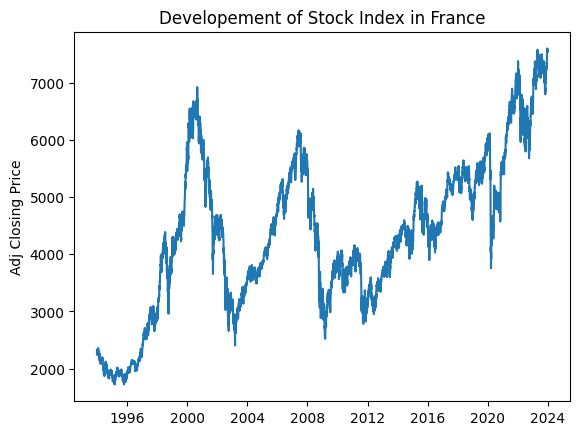

<Figure size 600x400 with 0 Axes>

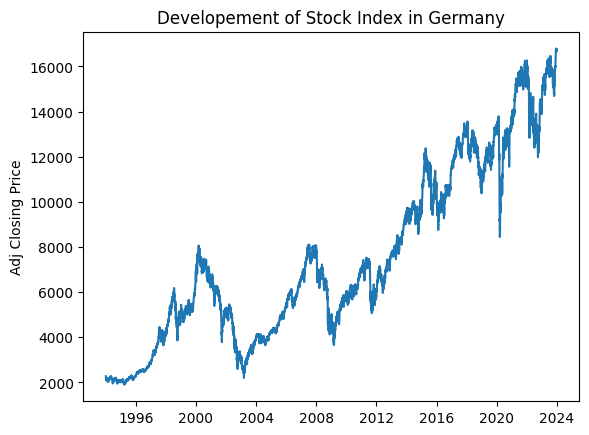

<Figure size 600x400 with 0 Axes>

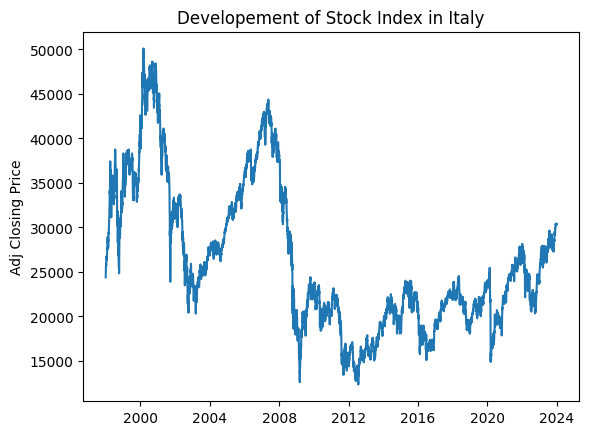

<Figure size 600x400 with 0 Axes>

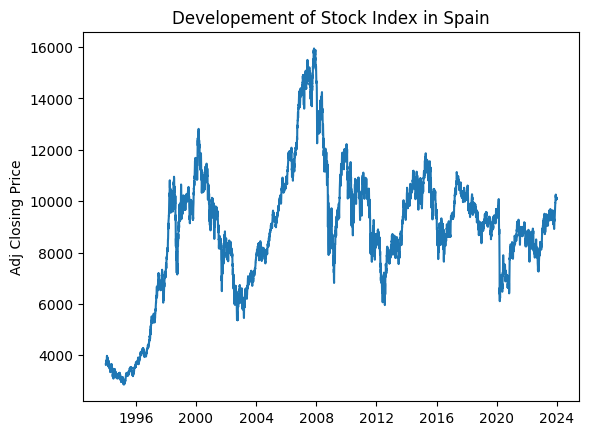

<Figure size 600x400 with 0 Axes>

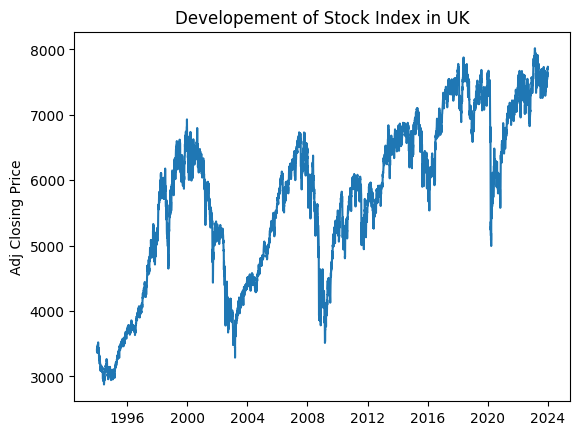

<Figure size 600x400 with 0 Axes>

In [7]:
# TODO
grouped_data = stock_data.groupby('Country')

# plot line charts of the stock markets for each country
for country, country_data in grouped_data:
    plt.plot(country_data['Date'], country_data['Adj Close'])
    plt.ylabel('Adj Closing Price')
    plt.title(f'Developement of Stock Index in {country}')
    plt.figure(figsize=(6, 4))
    plt.show()